In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
student_counts = pd.read_csv("student_counts.csv")
pair_counts = pd.read_csv("module_pairs.csv")
assignments = pd.read_csv("Assignments_with_clash.csv")

In [3]:
# Stress Score calculation = [weight(level)*1] + [weight(major)*1] + [weight(i_or_g)*2] + [weight(assignment_type)*3] + [weight(gap)*3] + weightage/100
# then standardize it to range 0 to 100

In [4]:
# how important/stressful each of these factors are to students
# sum to 10?
# level: 1
# major: 1
# i_or_g: 2
# assignment_type: 3
# gap: 3

In [5]:
# how stressful each level within the factors are
weights = {
    "level": {
        "level_1k": 0.1,
        "level_2k": 0.2,
        "level_3k": 0.3,
        "level_4k": 0.4
    },
    "major": {
        "DSA": 0.4,
        "ST": 0.6
    },
    "i_or_g": {
        "I": 0.3,
        "G": 0.4,
        "I&G": 0.3
    },
    "assignment_type": {
        "Presentation": 0.1,
        "Project": 0.25,
        "Participation": 0.05,
        "Quiz": 0.1,
        "Assignment": 0.15,
        "Exam": 0.35
    },
    "gap": {
        "One Week": 0.4,
        "Two Weeks": 0.3,
        "More Than Two Weeks": 0.15,
        "Others": 0.15 # assume weight to be 0.2 if gap is not known eg. start date is NA
    }
}

In [6]:
assignments["Start Date"] = pd.to_datetime(assignments["Start Date"])
assignments["Due Date"] = pd.to_datetime(assignments["Due Date"])
assignments.drop(["Deadline Time"], axis=1, inplace=True)
assignments = assignments.sort_values(by=["Due Date"], na_position="last")

In [7]:
assignments.head()

,Module Code,Semester,Assignment Name,Weightage,Assignment Type,Group or Individual,Start Date,Due Date,Level,Major
4,DSA2101,2020,Quiz 1,NaN,Quiz,I,2021-01-12,2021-01-19,level_2k,DSA
5,DSA2101,2020,Assignment 1,2.5,Assignment,I,2021-01-19,2021-01-26,level_2k,DSA
6,DSA2101,2020,Assignment 2,2.5,Assignment,I,2021-02-09,2021-02-16,level_2k,DSA
9,DSA2101,2020,Take-Home Midterms,30.0,Assignment,I,2021-03-02,2021-03-06,level_2k,DSA
7,DSA2101,2020,Assignment 3,2.5,Assignment,I,NaT,2021-03-23,level_2k,DSA


In [8]:
#by_date = assignments.groupby("Due Date").agg(max)
#by_date

In [9]:
#by_date = by_date.reset_index()
#by_date

In [10]:
# without getting max from each date group
by_date = assignments
by_date

,Module Code,Semester,Assignment Name,Weightage,Assignment Type,Group or Individual,Start Date,Due Date,Level,Major
4,DSA2101,2020,Quiz 1,NaN,Quiz,I,2021-01-12,2021-01-19,level_2k,DSA
5,DSA2101,2020,Assignment 1,2.5,Assignment,I,2021-01-19,2021-01-26,level_2k,DSA
6,DSA2101,2020,Assignment 2,2.5,Assignment,I,2021-02-09,2021-02-16,level_2k,DSA
9,DSA2101,2020,Take-Home Midterms,30.0,Assignment,I,2021-03-02,2021-03-06,level_2k,DSA
7,DSA2101,2020,Assignment 3,2.5,Assignment,I,NaT,2021-03-23,level_2k,DSA
...,...,...,...,...,...,...,...,...,...,...
88,ST4253,2210,Participation,10.0,Participation,I,NaT,NaT,level_4k,ST
89,ST4253,2210,Tutorial Presentation,10.0,Presentation,I,NaT,NaT,level_4k,ST
102,ST4248,2220,Presentation,10.0,Presentation,G,NaT,NaT,level_4k,ST
104,ST3247,2220,Tutorial Attendance,10.0,Participation,I,NaT,NaT,level_3k,ST


In [11]:
def get_gap(due_date, start_date):
    if pd.isnull(start_date):
        return "Others"
    else:
        gap = (due_date - start_date).days
        if gap <= 7:
            return "One Week"
        elif gap <= 14:
            return "Two Weeks"
        else:
            return "More Than Two Weeks"

In [12]:
min_weightage = by_date["Weightage"].min()
max_weightage = by_date["Weightage"].max()
min_stress = min_weightage/100 * 0.1 * 3 + 0.3 * 2 + 0.1 * 1 + 0.4 * 1 + 0.15 * 3
max_stress = max_weightage/100* 0.35 * 3 + 0.4 * 2 + 0.4 * 1 + 0.6 * 1 + 0.4 * 3

In [13]:
stress = []

for i in range(0, len(by_date)):
        weightage = by_date.loc[i,"Weightage"]
        assignment_type = by_date.loc[i,"Assignment Type"]
        i_g = by_date.loc[i,"Group or Individual"]
        level = by_date.loc[i,"Level"]
        major = by_date.loc[i,"Major"]
        gap = get_gap(by_date.loc[i,"Due Date"], by_date.loc[i,"Start Date"])
        stress_score = weightage/100*weights['assignment_type'][assignment_type] * 3 + weights['i_or_g'][i_g] * 2 + weights['level'][level] * 1 + weights['major'][major] * 1 + weights['gap'][gap] * 3
        normalized_score = (stress_score - min_stress)/(max_stress - min_stress)*100
        #stress.append(normalized_score)
        by_date.loc[i, "Stress"] = normalized_score

In [14]:
by_date

,Module Code,Semester,Assignment Name,Weightage,Assignment Type,Group or Individual,Start Date,Due Date,Level,Major,Stress
4,DSA2101,2020,Quiz 1,NaN,Quiz,I,2021-01-12,2021-01-19,level_2k,DSA,NaN
5,DSA2101,2020,Assignment 1,2.5,Assignment,I,2021-01-19,2021-01-26,level_2k,DSA,39.249656
6,DSA2101,2020,Assignment 2,2.5,Assignment,I,2021-02-09,2021-02-16,level_2k,DSA,39.249656
9,DSA2101,2020,Take-Home Midterms,30.0,Assignment,I,2021-03-02,2021-03-06,level_2k,DSA,44.928866
7,DSA2101,2020,Assignment 3,2.5,Assignment,I,NaT,2021-03-23,level_2k,DSA,4.830197
...,...,...,...,...,...,...,...,...,...,...,...
88,ST4253,2210,Participation,10.0,Participation,I,NaT,NaT,level_4k,ST,23.359339
89,ST4253,2210,Tutorial Presentation,10.0,Presentation,I,NaT,NaT,level_4k,ST,24.047728
102,ST4248,2220,Presentation,10.0,Presentation,G,NaT,NaT,level_4k,ST,33.226251
104,ST3247,2220,Tutorial Attendance,10.0,Participation,I,NaT,NaT,level_3k,ST,18.770078


In [15]:
# sum of stress scores on each day & list of module codes
agg_func = lambda x: list(set(x))
by_date.groupby('Due Date').agg({'Semester': max, 'Stress': sum, 'Module Code': agg_func})

,Semester,Stress,Module Code
Due Date,,,
2021-01-19,2020,0.000000,[DSA2101]
2021-01-26,2020,39.249656,[DSA2101]
2021-02-16,2020,39.249656,[DSA2101]
2021-03-06,2020,44.928866,[DSA2101]
2021-03-23,2020,4.830197,[DSA2101]
...,...,...,...
2023-04-07,2220,19.458467,[DSA3101]
2023-04-10,2220,38.733364,[ST4248]
2023-04-14,2220,121.041762,"[ST4248, DSA3101, DSA4212]"


In [16]:
# view dates with multiple assignments
multiples = by_date.groupby('Due Date').filter(lambda x: len(x) > 1)
multiples

,Module Code,Semester,Assignment Name,Weightage,Assignment Type,Group or Individual,Start Date,Due Date,Level,Major,Stress
15,DSA2101,2110,Tutorial Submission 4,2.0,Assignment,I,NaT,2021-09-17,level_2k,DSA,4.726939
28,DSA2102,2110,Assignment 1,4.0,Assignment,I,NaT,2021-09-17,level_2k,DSA,5.139972
29,DSA2102,2110,Assignment 2,4.0,Assignment,I,NaT,2021-10-15,level_2k,DSA,5.139972
17,DSA2101,2110,Tutorial Submission 6,2.0,Assignment,I,NaT,2021-10-15,level_2k,DSA,4.726939
39,DSA2102,2120,Midterm,25.0,Exam,I,2022-02-28,2022-02-28,level_2k,DSA,50.780174
40,DSA2102,2120,Finals,55.0,Exam,I,2022-04-25,2022-02-28,level_2k,DSA,65.236347
56,DSA4211,2210,Midterm,20.0,Exam,I,2022-09-28,2022-09-28,level_4k,DSA,57.549335
86,ST4231,2210,Midterm,20.0,Exam,I,2022-09-28,2022-09-28,level_4k,ST,66.727857
50,DSA3102,2210,Assignment 1,7.5,Assignment,I,NaT,2022-10-03,level_3k,DSA,10.452042
78,ST3248,2210,Assignment 4,2.5,Assignment,I,NaT,2022-10-03,level_3k,ST,18.597981


In [17]:
# view dates with 2 assignments
duplicates = by_date.groupby('Due Date').filter(lambda x: len(x) == 2)
duplicates

,Module Code,Semester,Assignment Name,Weightage,Assignment Type,Group or Individual,Start Date,Due Date,Level,Major,Stress
15,DSA2101,2110,Tutorial Submission 4,2.0,Assignment,I,NaT,2021-09-17,level_2k,DSA,4.726939
28,DSA2102,2110,Assignment 1,4.0,Assignment,I,NaT,2021-09-17,level_2k,DSA,5.139972
29,DSA2102,2110,Assignment 2,4.0,Assignment,I,NaT,2021-10-15,level_2k,DSA,5.139972
17,DSA2101,2110,Tutorial Submission 6,2.0,Assignment,I,NaT,2021-10-15,level_2k,DSA,4.726939
39,DSA2102,2120,Midterm,25.0,Exam,I,2022-02-28,2022-02-28,level_2k,DSA,50.780174
40,DSA2102,2120,Finals,55.0,Exam,I,2022-04-25,2022-02-28,level_2k,DSA,65.236347
56,DSA4211,2210,Midterm,20.0,Exam,I,2022-09-28,2022-09-28,level_4k,DSA,57.549335
86,ST4231,2210,Midterm,20.0,Exam,I,2022-09-28,2022-09-28,level_4k,ST,66.727857
50,DSA3102,2210,Assignment 1,7.5,Assignment,I,NaT,2022-10-03,level_3k,DSA,10.452042
78,ST3248,2210,Assignment 4,2.5,Assignment,I,NaT,2022-10-03,level_3k,ST,18.597981


In [18]:
# Duplicates
df = duplicates.groupby('Due Date').agg({'Semester': max, 'Stress': sum, 'Module Code': agg_func})
df[['Module 1', 'Module 2']] = pd.DataFrame(df['Module Code'].tolist(), index=df.index)
df.drop('Module Code', axis=1, inplace=True)
df = df.reset_index()
df

,Due Date,Semester,Stress,Module 1,Module 2
0,2021-09-17,2110,9.866911,DSA2102,DSA2101
1,2021-10-15,2110,9.866911,DSA2102,DSA2101
2,2022-02-28,2120,116.016521,DSA2102,None
3,2022-09-28,2210,124.277191,ST4231,DSA4211
4,2022-10-03,2210,29.050023,ST3248,DSA3102
5,2022-10-04,2210,133.914640,ST3248,ST3131
6,2022-11-11,2210,49.185406,ST4253,DSA3102
7,2023-02-06,2220,25.493346,ST4248,DSA1101
8,2023-03-06,2220,54.921983,ST4248,ST3247


In [19]:
df.merge(pair_counts, how='left', on=['Semester', 'Module 1', 'Module 2'])

,Due Date,Semester,Stress,Module 1,Module 2,Count
0,2021-09-17,2110,9.866911,DSA2102,DSA2101,NaN
1,2021-10-15,2110,9.866911,DSA2102,DSA2101,NaN
2,2022-02-28,2120,116.016521,DSA2102,None,NaN
3,2022-09-28,2210,124.277191,ST4231,DSA4211,25.0
4,2022-10-03,2210,29.050023,ST3248,DSA3102,NaN
5,2022-10-04,2210,133.914640,ST3248,ST3131,25.0
6,2022-11-11,2210,49.185406,ST4253,DSA3102,NaN
7,2023-02-06,2220,25.493346,ST4248,DSA1101,0.0
8,2023-03-06,2220,54.921983,ST4248,ST3247,22.0


# K-Means (not very helpful)

In [20]:
by_date['Gap'] = by_date.apply(lambda x: get_gap(x["Due Date"], x["Start Date"]), axis = 1)
by_date = by_date.drop(['Start Date', 'Due Date'], axis=1)
by_date

,Module Code,Semester,Assignment Name,Weightage,Assignment Type,Group or Individual,Level,Major,Stress,Gap
4,DSA2101,2020,Quiz 1,NaN,Quiz,I,level_2k,DSA,NaN,One Week
5,DSA2101,2020,Assignment 1,2.5,Assignment,I,level_2k,DSA,39.249656,One Week
6,DSA2101,2020,Assignment 2,2.5,Assignment,I,level_2k,DSA,39.249656,One Week
9,DSA2101,2020,Take-Home Midterms,30.0,Assignment,I,level_2k,DSA,44.928866,One Week
7,DSA2101,2020,Assignment 3,2.5,Assignment,I,level_2k,DSA,4.830197,Others
...,...,...,...,...,...,...,...,...,...,...
88,ST4253,2210,Participation,10.0,Participation,I,level_4k,ST,23.359339,Others
89,ST4253,2210,Tutorial Presentation,10.0,Presentation,I,level_4k,ST,24.047728,Others
102,ST4248,2220,Presentation,10.0,Presentation,G,level_4k,ST,33.226251,Others
104,ST3247,2220,Tutorial Attendance,10.0,Participation,I,level_3k,ST,18.770078,Others


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = by_date

# Preprocess the data using one hot encoding
categorical_cols = ['Assignment Type', 'Group or Individual', 'Level', 'Major', 'Gap']
for col in categorical_cols:
    one_hot = pd.get_dummies(data[col], prefix=col)
    data = data.drop(col, axis=1)
    data = pd.concat([data, one_hot], axis=1)

data = data.drop(['Semester', 'Weightage', 'Stress'], axis=1)
data

X = data.iloc[:, 2:]
X

,Assignment Type_Assignment,Assignment Type_Exam,Assignment Type_Participation,Assignment Type_Presentation,Assignment Type_Project,Assignment Type_Quiz,Group or Individual_G,Group or Individual_I,Group or Individual_I&G,Level_level_1k,Level_level_2k,Level_level_3k,Level_level_4k,Major_DSA,Major_ST,Gap_More Than Two Weeks,Gap_One Week,Gap_Others
4,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
5,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
6,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
9,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
7,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
89,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1
102,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
104,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1


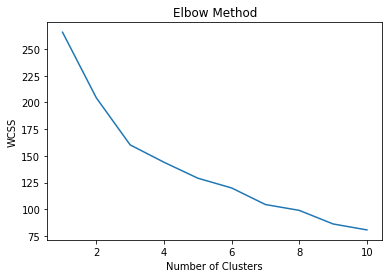

In [24]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# WCSS keeps decreasing with increasing k

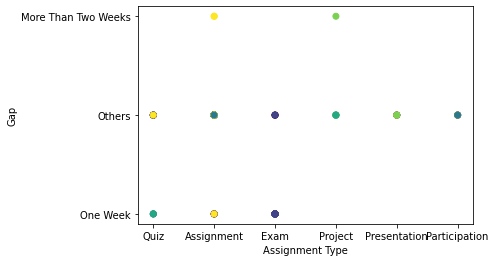

In [25]:
# Initialize the KMeans model with k number of clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the original data
data['cluster'] = labels

# Visualize the clusters
plt.scatter(by_date['Assignment Type'], by_date['Gap'], c=labels)
plt.xlabel('Assignment Type')
plt.ylabel('Gap')
plt.show()
